<a href="https://colab.research.google.com/github/vishnupchopra/Cataract_Detection_VGG19/blob/main/Cataract_Detection_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import numpy as np
import cv2
import os
import pandas as pd
from random import sample

import seaborn as sns
import matplotlib.pyplot as plt

from keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten


In [3]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vishnuchopra
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k


100%|██████████| 1.62G/1.62G [00:12<00:00, 138MB/s]


In [ ]:
!cp -r /content/drive/MyDrive/ResNet_Project  /content/Untitled

^C


In [4]:
path = "/content/ocular-disease-recognition-odir5k"
df = pd.read_csv(os.path.join(path, "full_df.csv"))
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [5]:
file_names = []
labels = []

for text, label, file_name in zip(df["Left-Diagnostic Keywords"], df["C"], df["Left-Fundus"]):

    if(("cataract" in text) and (label == 1)):
        file_names.append(file_name)
        labels.append(1)

    elif(("normal fundus" in text) and (label == 0)):
        file_names.append(file_name)
        labels.append(0)

for text, label, file_name in zip(df["Right-Diagnostic Keywords"], df["C"], df["Right-Fundus"]):

    if(("cataract" in text) and (label == 1)):
        file_names.append(file_name)
        labels.append(1)

    elif(("normal fundus" in text) and (label == 0)):
        file_names.append(file_name)
        labels.append(0)

print(len(file_names), len(labels))

6162 6162


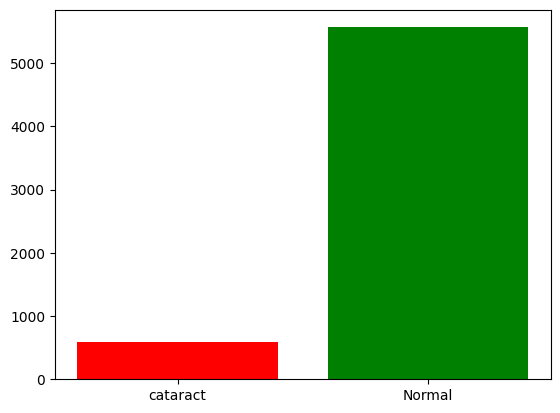

In [6]:
plt.bar([0,1], [len([i for i in labels if i == 1]), len([i for i in labels if i == 0])], color = ['r', 'g'])
plt.xticks([0, 1], ['cataract', 'Normal'])
plt.show()

In [7]:
ROW = 224
COL = 224

In [8]:
image_data = []
for idx, image_name in enumerate(file_names):

    img = cv2.imread(os.path.join(path,"preprocessed_images",image_name))
    try:
        img = cv2.resize(img, (ROW, COL))
        image_data.append(img)
    except:
        del labels[idx]

image_data = np.array(image_data)

print(image_data.shape)

(6078, 224, 224, 3)


In [9]:
temp = []
for idx, label in enumerate(labels):
    if label == 0:
        temp.append(idx)

temp = sample(temp, len([label for label in labels if label == 1]))

X_data = []
y_data = []

for idx in temp:
    X_data.append(image_data[idx])
    y_data.append(labels[idx])

temp = []
for idx, label in enumerate(labels):
    if label == 1:
        temp.append(idx)

for idx in temp:
    X_data.append(image_data[idx])
    y_data.append(labels[idx])

X_data = np.array(X_data)

y_data = np.array(y_data)
y_data = np.expand_dims(y_data, axis = -1)
y_data = to_categorical(y_data)

print(X_data.shape, y_data.shape)

(1178, 224, 224, 3) (1178, 2)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle = True, random_state = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(942, 224, 224, 3) (942, 2)
(236, 224, 224, 3) (236, 2)


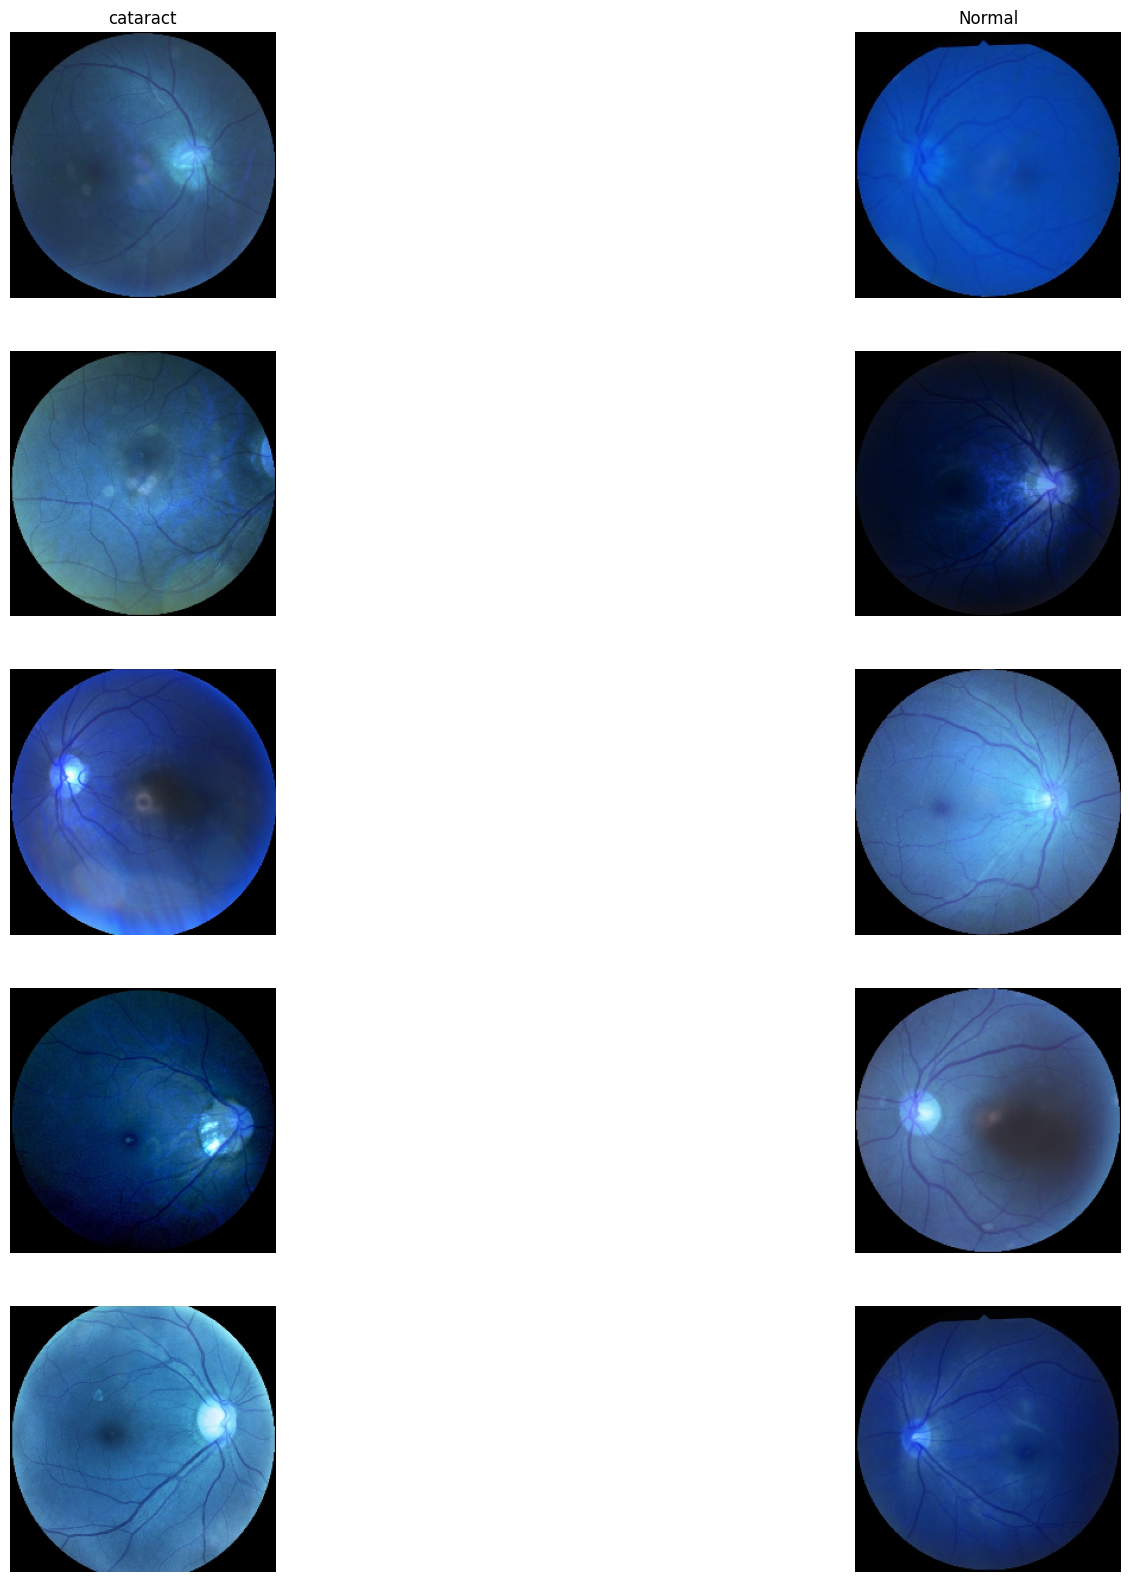

In [12]:
c = 0
n = 0

cataract_images = []
normal_images = []

for idx, label in enumerate(y_data):

    if(n <= 5 and np.argmax(label) == 0):
        normal_images.append(idx)
        n += 1
    elif(c <= 5):
        cataract_images.append(idx)
        c += 1

    if(n == 5 and c == 5):
        break

fig, ax = plt.subplots(5, 2, figsize = (20, 20))

ax[0, 0].title.set_text("cataract")
ax[0, 1].title.set_text("Normal")

for i in range(5):

    ax[i, 0].imshow(X_data[cataract_images[i]])
    ax[i, 0].axis('off')
    ax[i, 1].imshow(X_data[normal_images[i]])
    ax[i, 1].axis('off')

plt.show()

In [ ]:
vgg = VGG19(weights='imagenet', include_top = False, input_shape=(ROW, COL, 3))
for layer in vgg.layers:
    layer.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2,activation = "softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,630,210 (82.51 MB)

 Trainable params: 1,605,826 (6.13 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

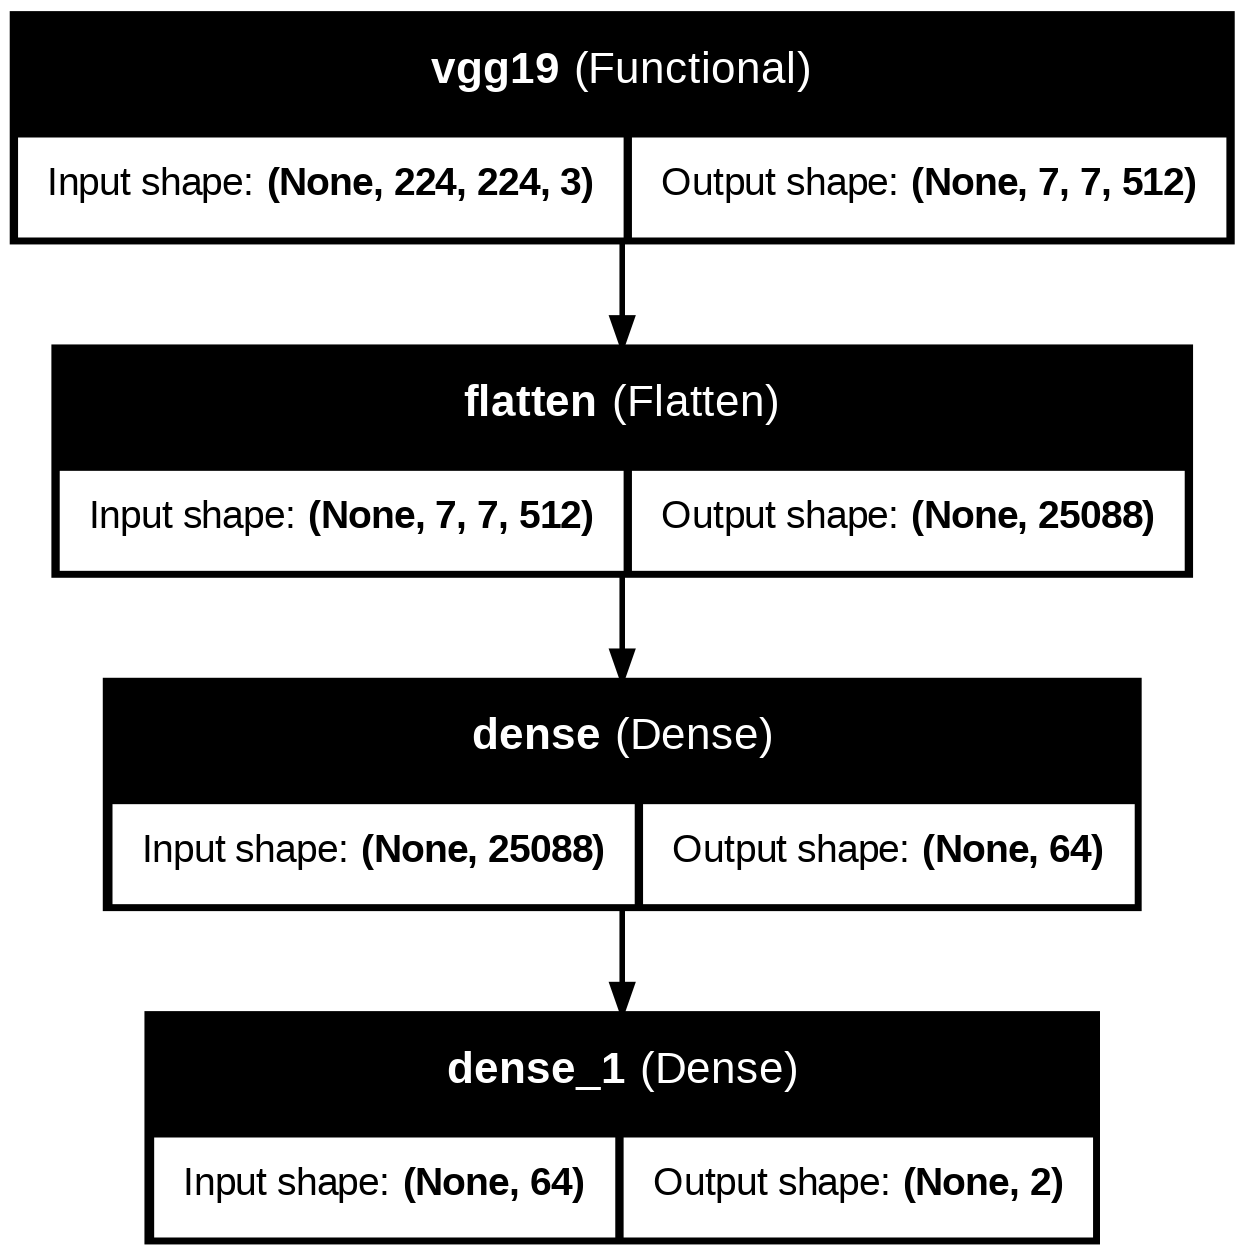

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer = 'adamax',
              loss = 'binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

history = model.fit(X_train, y_train,validation_data = (X_test, y_test),epochs = 12,batch_size = 100)

Epoch 1/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - Precision: 0.5564 - Recall: 0.5564 - accuracy: 0.5564 - loss: 10.5160 - val_Precision: 0.6844 - val_Recall: 0.6844 - val_accuracy: 0.6844 - val_loss: 3.2567
Epoch 2/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 708ms/step - Precision: 0.7619 - Recall: 0.7619 - accuracy: 0.7619 - loss: 2.4742 - val_Precision: 0.7418 - val_Recall: 0.7418 - val_accuracy: 0.7418 - val_loss: 2.1989
Epoch 3/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 834ms/step - Precision: 0.8360 - Recall: 0.8360 - accuracy: 0.8360 - loss: 1.2549 - val_Precision: 0.7377 - val_Recall: 0.7377 - val_accuracy: 0.7377 - val_loss: 1.5308
Epoch 4/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 842ms/step - Precision: 0.8925 - Recall: 0.8925 - accuracy: 0.8925 - loss: 0.5716 - val_Precision: 0.8033 - val_Recall: 0.8033 - val_accuracy: 0.8033 - val_loss: 0.9165
Epoch 5/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 737ms/step - Precision: 0.9166 - Recall: 0.9166 - accuracy: 0.9166 - loss: 0.4225 - val_Precision: 0.8197 - val_Recal

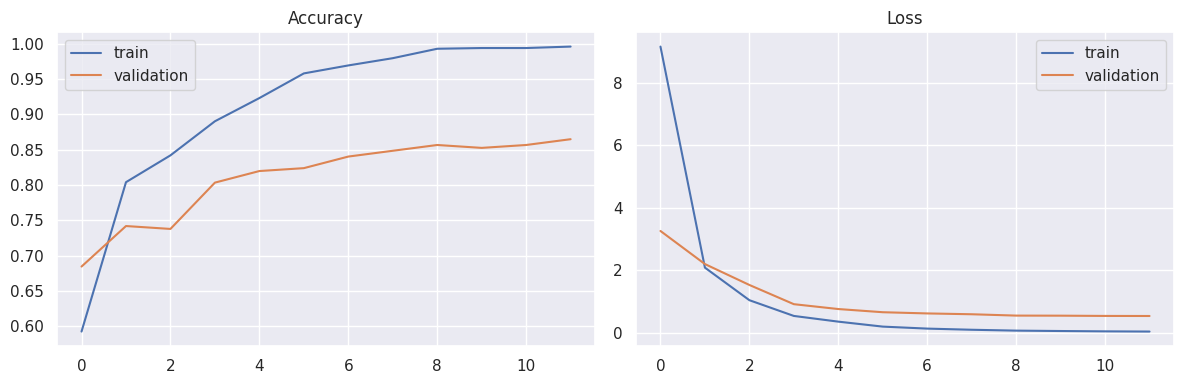

In [ ]:
sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
# Pass data as keyword arguments 'x' and 'y'
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
# Pass data as keyword arguments 'x' and 'y'
sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='validation')
plt.title('Loss')
plt.tight_layout()

#plt.savefig('epoch_history.png')
plt.show()

In [ ]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step


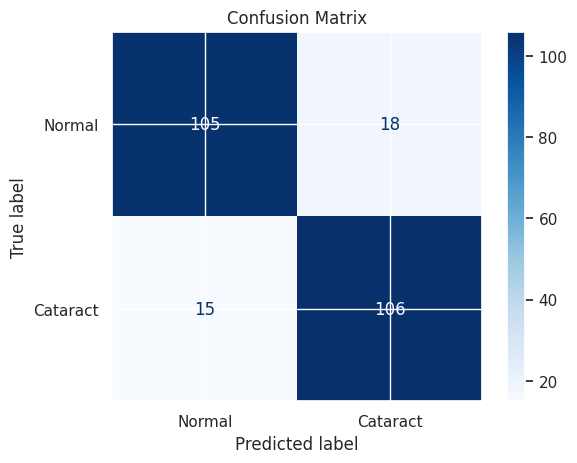

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


preds = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Cataract'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save('cataract_model.keras')